# Experiments with regression trees

In [1]:
import numpy as np
import pylab as pl
import models

## Generate synthetic data 
Simulate data from crazy function and add Gaussian noise.
n is the number of examples to simulate.

In [2]:
def generate_synthetic_1d_data(n):
    X = np.random.uniform(-20, 20, size=n)
    X.sort()
    # Crazy function without noise
    y_noiseless = np.cos(X) * X
    # Add gaussian noise to each data point
    y = y_noiseless + np.random.normal(0, 1.5, size=n)
    X = X.reshape((n,1))
    return X, y, y_noiseless

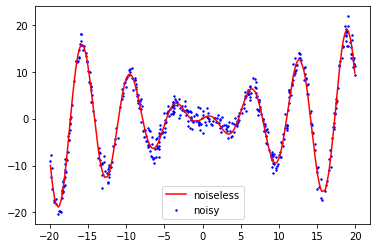

In [3]:
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

pl.scatter(X, y, c='b', s=2, label='noisy');
pl.plot(X, y_noiseless, c='r', label='noiseless')
pl.legend(loc='best');

## Regression trees
Visualize regression tree predictions on sythetic data as a function of the maximum depth (max_depth) of the tree.

In [ ]:
for max_depth in [3, 5, 10, 15, 20]:
    # Fit regression tree
    rt = models.RegressionTree(nfeatures = X.shape[1], max_depth = max_depth)
    rt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'RegressionTree(max depth = {max_depth})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, rt.predict(X), c='r', label='predicted')
    pl.legend(loc='best'); 

## Gradient-boosted regression tree (GBRT) boosting iteration number
Visualize GBRT predictions on sythetic data as a function of the number of number of boosting iterations (n_estimator) used to create the GBRT.

In [ ]:
# GBRT hyper-parameters
max_depth=3
regularization_parameter=.75
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for n_estimator in [2, 5, 10, 30, 100]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimator, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Boosting iterations = {n_estimator})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');


## Gradient-boosted regression tree (GBRT) regularization parameter
Visualize GBRT predictions on sythetic data as a function of the number of number of the regularization parameter

In [ ]:
# GBRT hyper-parameters
max_depth=3
n_estimators=20
# Simulate 500 data points
X, y, y_noiseless = generate_synthetic_1d_data(500)

for regularization_parameter in [.1, .3, .6, .9]:
    # Fit the GBR
    gbrt = models.GradientBoostedRegressionTree(
        nfeatures = X.shape[1], 
        max_depth = max_depth, 
        n_estimators = n_estimators, 
        regularization_parameter = regularization_parameter
    )
    gbrt.fit(X=X, y=y)
    pl.figure()
    pl.title(f'GradientRegressionTree(Regularization parameter = {regularization_parameter})')
    # Plot simulated data before noise was added
    pl.plot(X, y_noiseless, c='b', label='noiseless')
    # Plot regression tree predicted values
    pl.plot(X, gbrt.predict(X), c='r', label='predicted')
    pl.legend(loc='best');

## Summary 
At this point, you have successfully run all three experiments in this notebook. Please summarize the emperical results. Try to consider:

1. Explain the qualitative differences in regression learned as a function of depth. Should we set the max depth very high or very low?

Your response goes here..

2. Differences in how regression trees and GBRTs fit the data.

Your response goes here..

3. The trade-off between the regularization parameter and the number of boosting iterations in the GBRT.

Your response goes here..